In [ ]:
!pip install gensim

In [ ]:
s1="The queen who travelled across the vast kingdom governs wisely"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def tokenize(text):
    # Simple whitespace + lowercase tokenization for teaching
    return text.lower().split()

In [ ]:
tokens = tokenize(s1)
print(tokens)

['the', 'queen', 'who', 'travelled', 'across', 'the', 'vast', 'kingdom', 'governs', 'wisely']


In [ ]:
sentences = [s1]
vec = CountVectorizer().fit_transform(sentences).toarray()

In [ ]:

print("BoW Vectors:")
print(vec)

BoW Vectors:
[[1 1 1 1 2 1 1 1 1]]


In [ ]:
vectorizer = CountVectorizer()
bow_vec = vectorizer.fit_transform([s1]).toarray()[0]
vocab = vectorizer.get_feature_names_out()

# Build a simplistic co-occurrence matrix (outer product)
bow_matrix = np.outer(bow_vec, bow_vec)


In [ ]:
bow_matrix

Text(0.5, 1.0, 'BoW Co-occurrence Matrix')

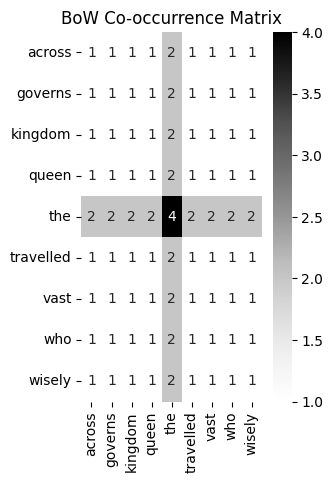

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(bow_matrix, annot=True, cmap="Greys", xticklabels=vocab, yticklabels=vocab)
plt.title("BoW Co-occurrence Matrix")

Task 2 – Self-Attention

In [ ]:
words = tokenize(s1)

In [ ]:
np.random.seed(42)
embeddings = {w: np.random.randn(16) for w in words}

In [ ]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

def attention_matrix(words):
    X = np.array([embeddings[w] for w in words])   # T × D
    scores = X @ X.T
    # print(scores) # Removed the incorrect 'print(score)' statement
    normalized = np.array([softmax(row) for row in scores])
    return normalized

In [ ]:
def dot_products(words):
    X = np.array([embeddings[w] for w in words])   # T × D
    scores = X @ X.T                               # dot products
    return scores

dot_products(words)

array([[ 8.86767266, -3.11368899,  0.43814245,  5.30846306,  4.82067478,
         8.86767266,  2.21500978,  0.31356558, -3.33136215, -3.29235253],
       [-3.11368899, 14.19068542,  4.00727096, -3.84019794, -3.42454373,
        -3.11368899, -1.75111609, -4.43643733, -3.09898204,  3.65609555],
       [ 0.43814245,  4.00727096, 13.68537383, -0.84682073, -3.32700042,
         0.43814245,  1.0445052 , -4.1181123 , -1.15033695, -3.11133365],
       [ 5.30846306, -3.84019794, -0.84682073, 11.02260352,  0.41391429,
         5.30846306,  2.18428644, -3.51354463,  2.92873051, -1.32255337],
       [ 4.82067478, -3.42454373, -3.32700042,  0.41391429, 20.59878657,
         4.82067478, -5.47795228,  0.16947663, -3.56373793, -1.70468383],
       [ 8.86767266, -3.11368899,  0.43814245,  5.30846306,  4.82067478,
         8.86767266,  2.21500978,  0.31356558, -3.33136215, -3.29235253],
       [ 2.21500978, -1.75111609,  1.0445052 ,  2.18428644, -5.47795228,
         2.21500978, 10.68391843,  3.94484316

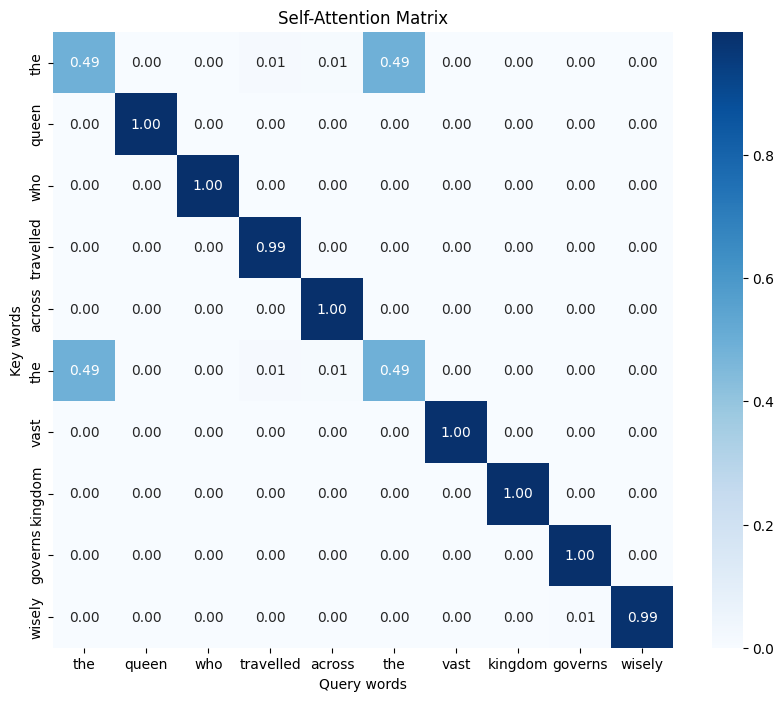

In [ ]:
# Ensure the words list is available (from previous steps)
# words = tokenize(s1)

# Compute the attention matrix using the defined function
attention_scores = attention_matrix(words)

# Display the attention matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_scores, annot=True, cmap="Blues",
            xticklabels=words, yticklabels=words, fmt=".2f")
plt.title("Self-Attention Matrix")
plt.xlabel("Query words")
plt.ylabel("Key words")
plt.show()

Task 3 – Side-by-Side Comparison
Create a figure with BoW heatmap on the left and Attention heatmap on the right.


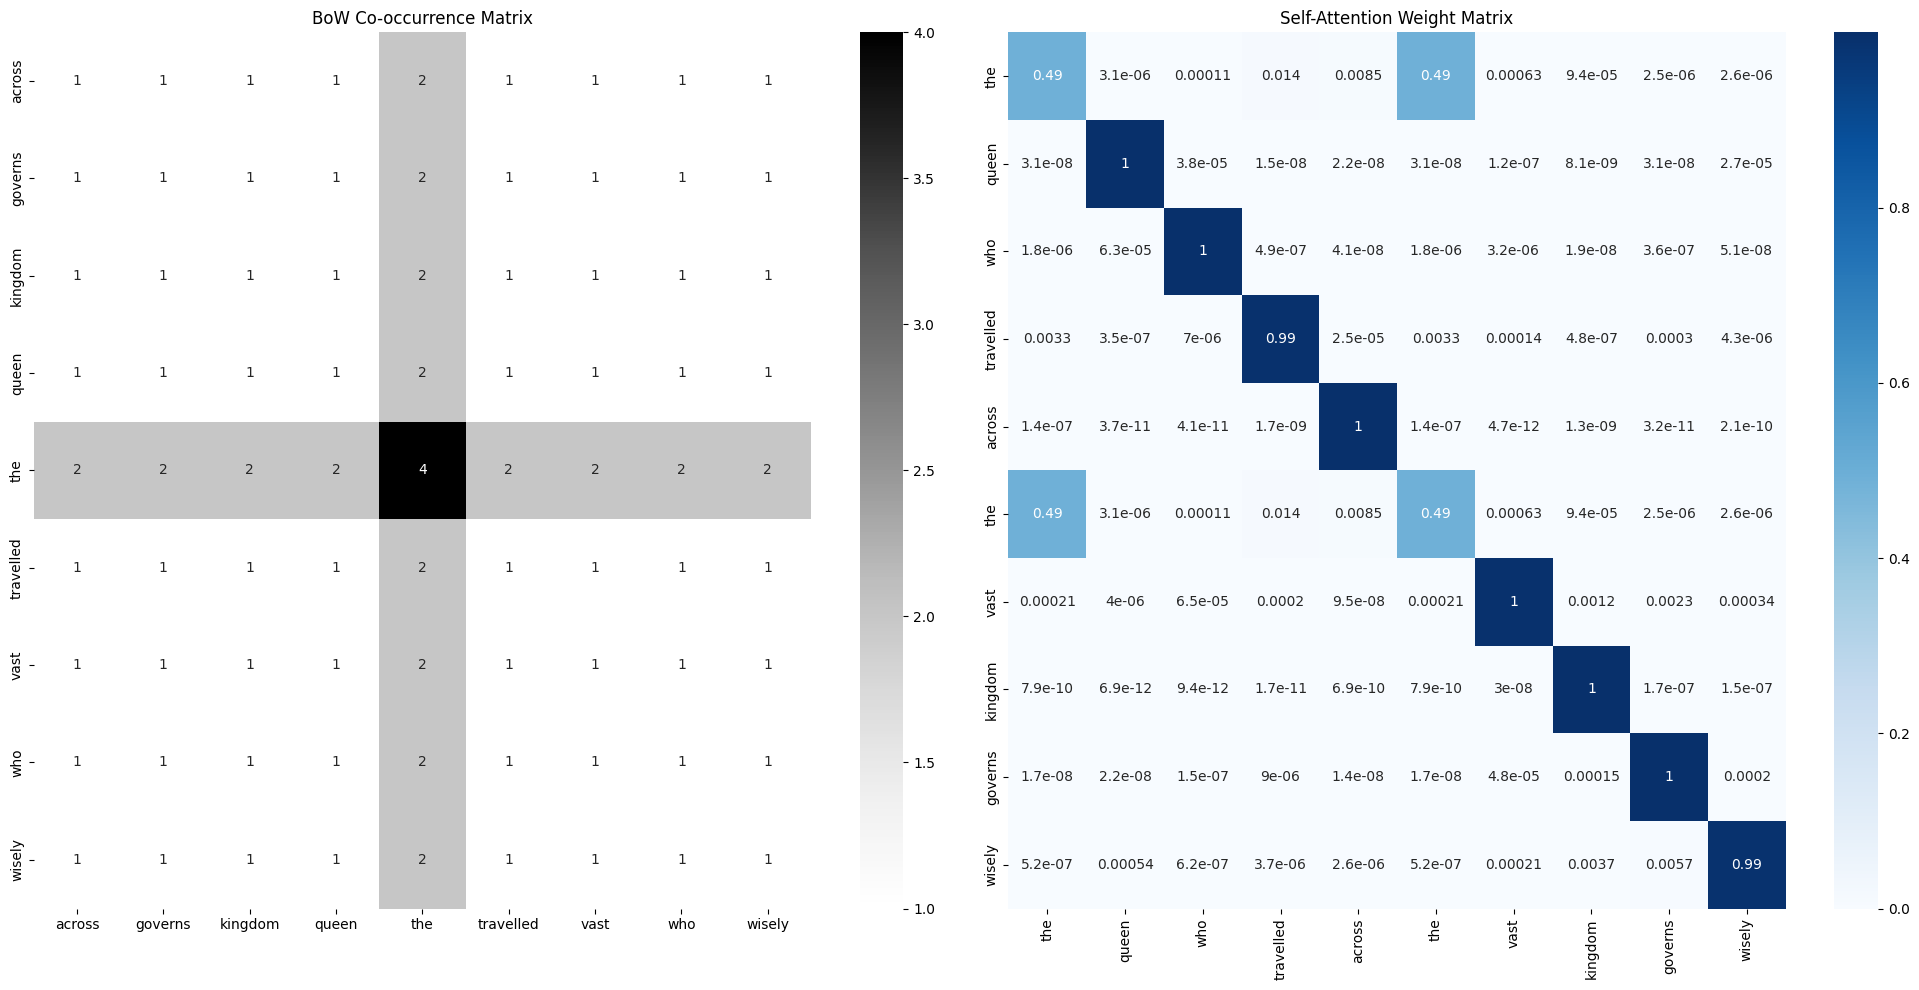

In [ ]:
att_matrix = attention_matrix(words)

plt.figure(figsize=(20, 10))

# --- BoW --- (left plot)
plt.subplot(1, 2, 1)
sns.heatmap(bow_matrix, annot=True, cmap="Greys", xticklabels=vocab, yticklabels=vocab)
plt.title("BoW Co-occurrence Matrix")

# --- Attention --- (right plot)
plt.subplot(1, 2, 2)
sns.heatmap(att_matrix, annot=True, cmap="Blues", xticklabels=words, yticklabels=words)
plt.title("Self-Attention Weight Matrix")

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()